In [1]:
import re
import sys
import os
import numpy as np
import scipy.linalg as SL

In [2]:
def red_green_blue():
    res = list()
    with open('rgb.txt') as fh:
        lines = fh.readlines()
    for rgb in lines:
        s = re.sub(r'(\s*)(\d+)(\s*)(\d+)(\s*)(\d+)(\s*)(\t*)(\S+)(\s*)(\S*)(\s*)(\S*)(\n)',
                   r'\2\t\4\t\6\t\8\9\10\11\12',
                   rgb)
        #print(repr(s))
        res.append(s)
    return res

r = red_green_blue()

In [3]:
r[:10]

['245\t255\t250\tmint cream',
 '245\t255\t250\tMintCream',
 '240\t255\t255\tazure',
 '240\t248\t255\talice blue',
 '240\t248\t255\tAliceBlue',
 '230\t230\t250\tlavender',
 '255\t240\t245\tlavender blush',
 '255\t240\t245\tLavenderBlush',
 '255\t228\t225\tmisty rose',
 '255\t228\t225\tMistyRose']

In [4]:
def word_frequencies(fname):
    res = list()
    with open(fname) as fh:
        lines = fh.readlines()
    lines_fixed = list()
    for line in lines:
        l = line.replace('\n', '').strip("""!"#$%&'()*,-./:;?[]_ @""") # lines level
        if len(l) > 0:
            words = l.split()
            clean_words = list()
            for word in words:
                if not word.isspace() and len(word) > 0:
                    w = word.strip("""!"#$%&'()*,-./:;?[]_ @""") # words level
                    if len(w) > 0: # Do not remove empty character to pass test
                     clean_words.append(w)
            lines_fixed.append(clean_words)
    # Generate unique words from the text
    unique_words = set()
    for words in lines_fixed:
        unique_words = unique_words.union(set(words)) # Do not unify case to pass test
    # Create dict of word count
    result_dict = dict()
    for k in unique_words:
        result_dict[k] = 0
        counter = 0
        for sentence in lines_fixed:
            counter += sentence.count(k)
        result_dict[k] = counter
    return result_dict

def main():
    res = word_frequencies('./alice.txt')
    print(res['Creating'])
    for k in res:
        print(f'{k} \t{res[k]}')
main()

1
denial 	1
enough--I 	1
share 	1
a--I'm 	2
KIND 	1
energetic 	1
fancy 	1
try 	3
continued 	2
Why 	8
hold 	2
Duck 	3
daisies 	1
scratching 	1
providing 	4
modified 	1
mentioned 	1
V--ADVICE 	1
miles 	1
There 	17
II--THE 	1
gloves 	5
That's 	5
hedge 	2
together 	5
RABBIT 	2
PLEASE 	1
lot 	1
know--No 	1
furrows 	1
being 	2
fairly 	1
draw 	1
learn 	1
restrictions 	2
works 	32
size 	10
watched 	1
ma 	1
lips 	1
clubs 	1
digging 	1
hookah 	3
Even 	1
Fish-Footman 	2
Sure 	2
let 	1
till 	6
safe 	1
your 	25
performances 	1
Release 	1
They're 	1
easy 	3
inquisitively 	1
sooner 	1
PEPPER 	1
extent 	1
write 	1
making 	3
removed 	2
1.B 	1
smiled 	1
door 	23
excellent 	1
thunderstorm 	1
Nor 	1
North 	1
laws 	8
DIRECT 	1
uneasily 	1
Perhaps 	1
1.F.3 	4
hastily 	8
array 	1
explanation 	2
International 	1
creation 	1
for 	64
Title 	1
persons 	1
atom 	1
taste 	2
throwing 	1
inwards 	1
choked 	1
window 	7
beds 	1
smoke 	1
Prizes 	2
most 	4
toast 	1
girl 	2
SENDS 	1
First 	5
remained 	2
Creating 	1
diffic

EXPRESS 	1
golden 	6
nose 	1
distribute 	5
LITTLE 	1
machine 	1
caught 	2
Was 	1
THAT 	2
You're 	4
BEFORE 	1
wept 	1
present--at 	1
them 	30
effect 	2
mixed 	1
beating 	1
crimson 	1
THIS 	5
kills 	1
elect 	1
Now 	5
more 	24
1500 	1
disappeared 	1
dressed 	1
now--Don't 	1
state 	6
permanent 	1
trademark/copyright 	1
QUEEN 	1
execution 	2
necessarily 	1
table 	14
Cheshire-Cats 	1
WORK 	1
morning 	3
draggled 	1
but 	43
volunteer 	1
going 	12
1.E.4 	1
over 	14
USE 	1
death 	1
each 	4
snatch 	2
hurried 	5
ceiling 	1
floor 	2
picking 	1
employee 	1
usual 	2
having 	3
despair 	1
note-book 	1
Rabbit's--"Pat 	1
play 	6
Jack-in-the-box 	1
methods 	1
changes 	1
front 	2
sat 	5
ladder 	1
WARRANTIES 	2
pairs 	1
http://gutenberg.org/license 	1
tax 	6
milk 	1
three 	8
angry 	3
shriek 	2
donate 	3
X--ALICE'S 	1
made 	11
Use 	2
pack 	4
GABRIEL 	2
representations 	1
shoes 	1
royalty 	1
compliance 	4
CONSEQUENTIAL 	1
book-shelves 	1
Three 	1
would 	12
smaller 	1
anywhere 	2
Herald 	1
Morcar 	1
drink 	3
l

In [5]:
res = word_frequencies('./alice.txt')
print(f"{res['creating']}, {res['Creating']}")

3, 1


In [6]:
def file_extensions(fname):
    extensions = set()
    res = dict()
    noext = list()
    with open(fname) as fh:
        lines = fh.read().splitlines()
        for fn in lines:
            if fn.find(".") > 0:
                ext = fn.split(".")[-1]
                if ext not in res.keys():
                    res[k] = [fn]
                else:
                    res[k].append(fn)
            else:
                noext.append(fn)
    return (noext, res)

In [7]:
# Init
class Prepend():
    def __init__(self, prepend_str):
        self.start = prepend_str

    def write(self, text):
        print(f'{self.start} {text}')

def main():
    p = Prepend("+++ ")
    p.write("Hello")
main()

+++  Hello


In [51]:
# Overriding logical operators
class Rational():
    def __init__(self, numerator, denominator):
        self.numerator = numerator
        self.denominator = denominator
    def __str__(self):
        return f'{self.numerator}/{self.denominator}'
    def __repr__(self):
        return f'{self.numerator}/{self.denominator}'
    def __add__(self, other):
        denominator = self.denominator * other.denominator
        numerator = (denominator/self.denominator) * self.numerator + (denominator/other.denominator) * other.numerator
        return Rational(numerator, denominator)
    def __sub__(self, other):
        denominator = self.denominator * other.denominator
        numerator = (denominator/self.denominator) * self.numerator - (denominator/other.denominator) * other.numerator
        return Rational(numerator, denominator)
    def __mul__(self, other):
        numerator = self.numerator * other.numerator
        denominator = self.denominator * other.denominator
        return Rational(numerator, denominator)
    def __truediv__(self, other):
        numerator = self.numerator * other.denominator
        denominator = self.denominator * other.numerator
        return Rational(numerator, denominator)
    def __lt__(self, other):
        return True if self.numerator/self.denominator < other.numerator/other.denominator else False
    def __gt__(self, other):
        return True if self.numerator/self.denominator > other.numerator/other.denominator else False
    def __eq__(self, other):
        return True if self.numerator/self.denominator == other.numerator/other.denominator else False


a = Rational(1,4)
b = Rational(2,3)
c = a + b
print(f'a = {a}, b = {b}')
print(f'a+b = {a + b}')
print(f'a-b={a-b}, a*b={a*b}, a/b={a/b}, a<b={a<b} a>b={a>b},  a==b = {a==b}')


a = 11.0/12, b = 2/3
a+b = None
a-b=99.0/108, a*b=114.0/108, a/b=171.0/72, a<b=False a>b=True,  a==b = False


In [34]:
# Exception nesting
test_str = "abd 123 1.2 test 13.2 -1"
def extract_numbers(text):
    items = text.split(" ")
    res = list()
    for item in items:
        try:
            i = int(item)
            res.append(i)
        except ValueError:
            try:
                f = float(item)
                res.append(f)
            except ValueError:
                continue
    return res
extract_numbers(test_str)

[123, 1.2, 13.2, -1]

In [81]:
# Numpy
np.random.seed(0)
x = np.random.randint(0, 5, (3,3))
y = np.random.randint(5, 10, (3,3))
x, y

(array([[4, 0, 3],
        [3, 3, 1],
        [3, 2, 4]]),
 array([[5, 5, 9],
        [7, 6, 5],
        [6, 6, 5]]))

In [148]:
# Vector lengths
def vector_lengths(x):
    n, m = x.shape
    #SL.norm(x, axis=1)
    return np.sqrt(np.sum(np.power(x, [2]), axis=1))
vector_lengths(x)

array([5.        , 4.35889894, 5.38516481])

In [137]:
# Vector angles
def vector_angles(x, y):
    if len(x.shape) > 1: # process a matrix of vectors
        n = x.shape[0]
        angles_radians = np.zeros(n)
        for i in range(n):
            inner_prod = sum(x[i][:] * y[i][:])
            norm_prod = np.sqrt(sum(x[i][:] * x[i][:])) * np.sqrt(sum(y[i][:] * y[i][:]))
            angles_radians[i] = np.arccos(np.clip(inner_prod/norm_prod, -1.0, 1.0))
        angles_radians
        return np.degrees(angles_radians)
    else: # process single vectors
        inner_prod = sum(x * y)
        norm_prod = np.sqrt(sum(x * x)) * np.sqrt(sum(y * y))
        angle_radians = np.arccos(np.clip(inner_prod/norm_prod, -1.0, 1.0))
        return np.degrees(angle_radians)
vector_angles(np.array([4, 5, 6]), np.array([4, 5, 6])), vector_angles(x, y)

(1.2074182697257333e-06, array([34.78668522, 15.75047072, 19.48561866]))

In [165]:
def multiplication_table(n):
    vec = np.arange(n)
    for i in vec:
        print(vec[i] * vec)
    return
multiplication_table(4)

[0 0 0 0]
[0 1 2 3]
[0 2 4 6]
[0 3 6 9]


## Image Processing

In [36]:
import matplotlib.pyplot as plt
import numpy as np

(302, 2744, 4)
The image consists of 828688 pixels


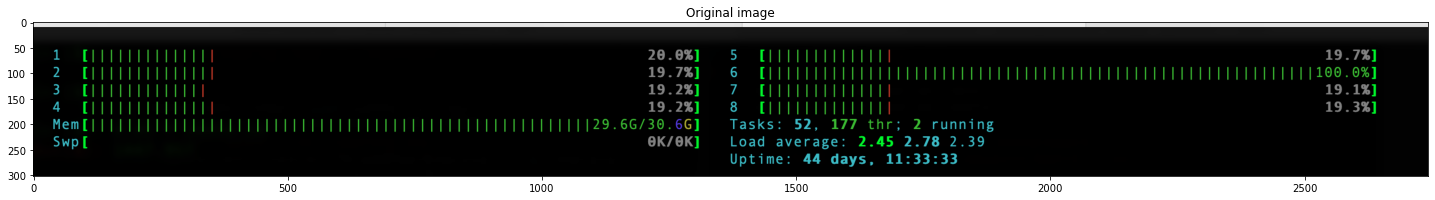

In [38]:
# Each image is a multi-dimensional matrix
# A CYMK image has 4 channels

plt.figure(figsize=(25,10))
painting=plt.imread("images/memory_filled.png")
plt.title('Original image')
print(painting.shape)
print(f"The image consists of {painting.shape[0] * painting.shape[1]} pixels")
plt.imshow(painting);

In [39]:
# Adjust the layers
adjusted_c = painting[:,:,0]  *  0.2126
adjusted_m = painting[:,:,1]  * 0.7152
adjusted_y = painting[:,:, 2] * 0.0722
adjusted_k = painting[:,:, 3] * 1

print(f'channel shapes: {adjusted_c.shape},{adjusted_m.shape},{adjusted_y.shape},{adjusted_k.shape}')
print(f'Image resolution: {adjusted_c.shape[0] * adjusted_c.shape[1]}')

channel shapes: (302, 2744),(302, 2744),(302, 2744),(302, 2744)
Image resolution: 828688


In [40]:
# repackage the image into a n-dimensional array
adj_painting = np.ones((302, 2744, 4), dtype=np.float32)
adj_painting[:,:,0] = adjusted_c
adj_painting[:,:,1] = adjusted_m
adj_painting[:,:,2] = adjusted_y
adj_painting[:,:,3] = adjusted_k

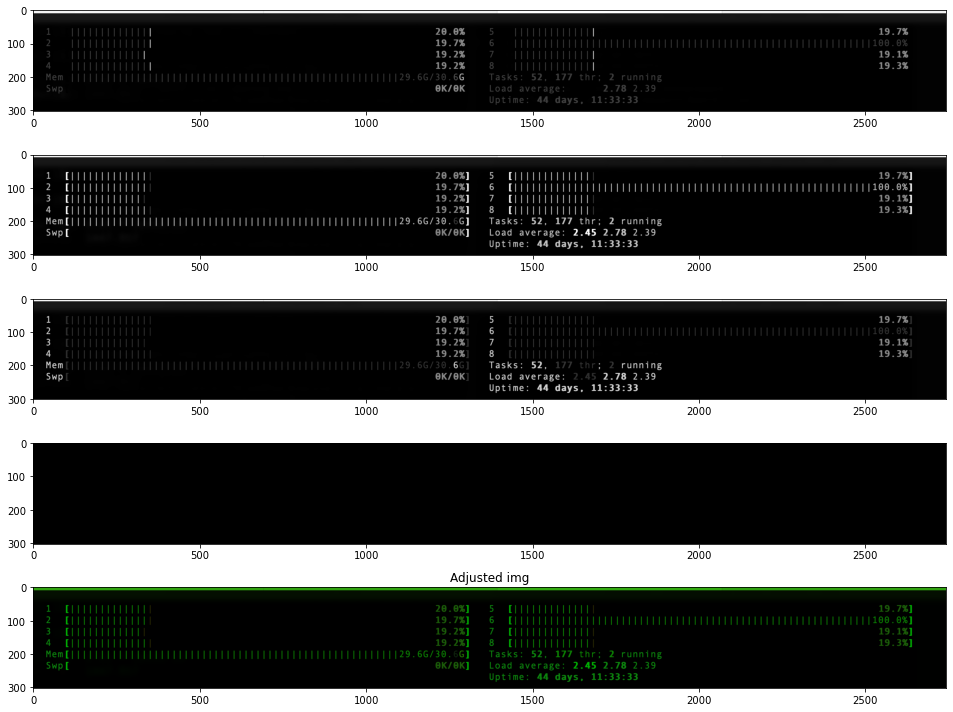

In [48]:
# visualize one adjusted channel
fig, ax = plt.subplots(5, 1, figsize=(25,10), tight_layout=True)
ax[0].imshow(adjusted_c)
ax[1].imshow(adjusted_m)
ax[2].imshow(adjusted_y)
ax[3].imshow(adjusted_k)

# adjusted
ax[4].imshow(adj_painting, cmap='gray')
_=ax[4].set_title('Adjusted img')

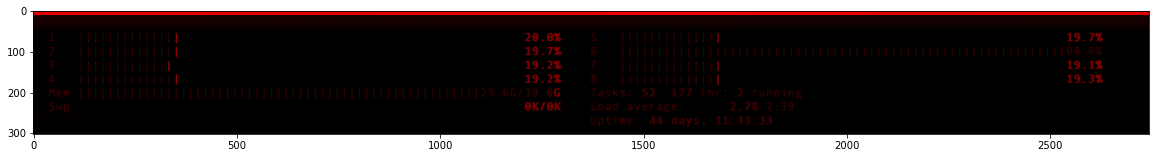

In [52]:
plt.figure(figsize=(20,15))

def to_red(ndarray):
    img = ndarray.copy()
    img[:,:,1] = 0
    img[:,:,2] = 0
    return img

_ = plt.imshow(to_red(painting))